# Analyse de Sentiment avec BERT


## Étape 1: Installation des Dépendances


In [ ]:
!pip install transformers torch pandas numpy

## Étape 2: Importation des Bibliothèques

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd

## Étape 3: Chargement du Modèle et du Tokenizer
BERT nécessite deux composants principaux :

1. Le tokenizer : pour convertir le texte en tokens que BERT peut comprendre
2. Le modèle : le modèle BERT pré-entraîné pour l'analyse de sentiment

In [ ]:
# Chargement du tokenizer
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Chargement du modèle
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

## Préparation des Données de Test
Créons quelques exemples pour tester notre modèle :

In [ ]:
# Création d'une liste de textes à analyser
textes_test = [
    "Ce produit est absolument fantastique, je l'adore !",
    "Le service était correct, mais rien d'extraordinaire",
    "Je suis très déçu par la qualité, c'est terrible"
]

# Création d'un DataFrame pour une meilleure visualisation
df_test = pd.DataFrame(textes_test, columns=['texte'])
df_test

,texte
0,"Ce produit est absolument fantastique, je l'ad..."
1,"Le service était correct, mais rien d'extraord..."
2,"Je suis très déçu par la qualité, c'est terrible"


## Tokenization du Texte
La tokenization est le processus de conversion du texte en tokens numériques :

In [ ]:
# Tokenization du premier texte
texte = textes_test[0]
tokens = tokenizer(texte, padding=True, truncation=True, return_tensors="pt")

print("Texte original:", texte)
print("\nTokens encodés:", tokens['input_ids'])
print("\nMots décodés:", tokenizer.convert_ids_to_tokens(tokens['input_ids'][0]))

Texte original: Ce produit est absolument fantastique, je l'adore !

Tokens encodés: tensor([[  101, 10630, 21275, 10182, 23073, 29505, 10503, 62418, 35386, 11184,
           117, 10149,   154,   112, 39098, 10247,   106,   102]])

Mots décodés: ['[CLS]', 'ce', 'produit', 'est', 'abs', '##olu', '##ment', 'fant', '##asti', '##que', ',', 'je', 'l', "'", 'ado', '##re', '!', '[SEP]']


## Analyse de Sentiment

In [ ]:
# Désactivation du calcul de gradient car nous faisons uniquement de l'inférence
with torch.no_grad():
    # Passage des tokens dans le modèle
    outputs = model(**tokens)
    # Application de softmax pour obtenir des probabilités
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Obtention de la note (de 1 à 5)
    rating = torch.argmax(predictions) + 1

print(f"Note prédite: {rating}/5")
print(f"Probabilités pour chaque note: {predictions[0].numpy()}")

Note prédite: 5/5
Probabilités pour chaque note: [0.00221366 0.00151513 0.01768828 0.09138175 0.8872012 ]


## Analyse de Tous les Textes

In [ ]:
# Création d'une fonction pour analyser un texte
def analyser_sentiment(texte):
    tokens = tokenizer(texte, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        rating = torch.argmax(predictions) + 1
    return rating.item(), predictions[0].numpy()

# Analyse de tous les textes
resultats = []
for texte in textes_test:
    note, probs = analyser_sentiment(texte)
    resultats.append({
        'texte': texte,
        'note': note,
        'probabilites': probs
    })

# Création d'un DataFrame avec les résultats
df_resultats = pd.DataFrame(resultats)
df_resultats

,texte,note,probabilites
0,"Ce produit est absolument fantastique, je l'ad...",5,"[0.0022136623, 0.0015151278, 0.017688276, 0.09..."
1,"Le service était correct, mais rien d'extraord...",3,"[0.033489496, 0.22316995, 0.59649026, 0.131132..."
2,"Je suis très déçu par la qualité, c'est terrible",1,"[0.605071, 0.3665056, 0.026829949, 0.001034832..."


## Visualisation des Résultats

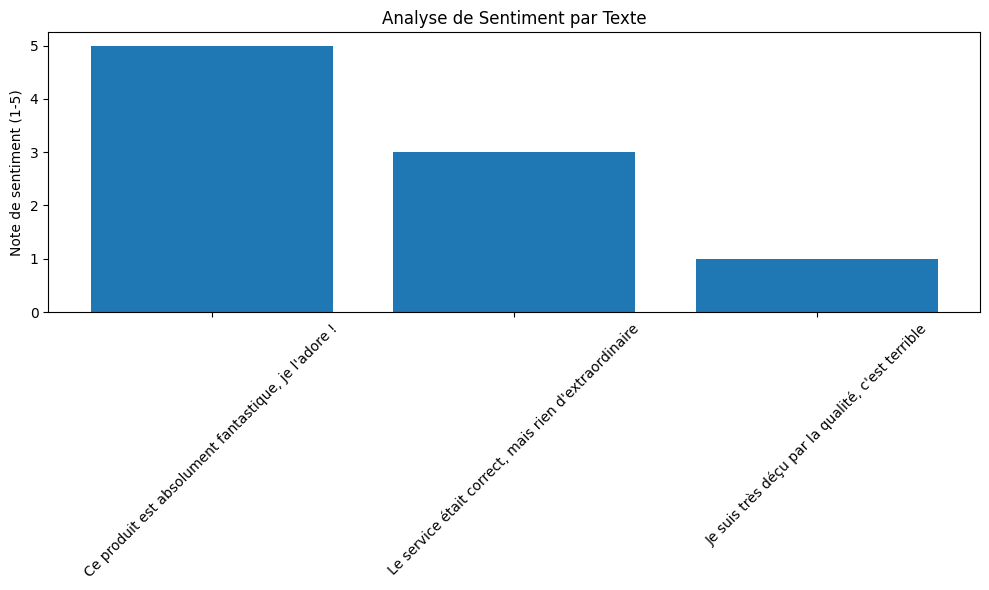

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(df_resultats)), df_resultats['note'])
plt.xticks(range(len(df_resultats)), df_resultats['texte'], rotation=45)
plt.ylabel('Note de sentiment (1-5)')
plt.title('Analyse de Sentiment par Texte')
plt.tight_layout()
plt.show()

#  Analyse de Texte en Temps Réel

In [ ]:
def analyser_nouveau_texte(texte):
    note, probs = analyser_sentiment(texte)
    print(f"\nTexte analysé: {texte}")
    print(f"Note: {note}/5")
    print("Probabilités pour chaque note (1-5):")
    for i, prob in enumerate(probs, 1):
        print(f"Note {i}: {prob:.3f}")

# Test avec un nouveau texte
nouveau_texte = "Le service client était vraiment excellent et professionnel"
analyser_nouveau_texte(nouveau_texte)


Texte analysé: Le service client était vraiment excellent et professionnel
Note: 5/5
Probabilités pour chaque note (1-5):
Note 1: 0.011
Note 2: 0.013
Note 3: 0.059
Note 4: 0.237
Note 5: 0.681


# GPT-2 pour la Génération de Texte

## Étape 1: Installation des Dépendances

In [ ]:
!pip install transformers torch numpy pandas


## Importation des Bibliothèques

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import pandas as pd

## Chargement du Modèle et du Tokenizer


In [ ]:
# Chargement du tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Chargement du modèle
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Si vous avez un GPU disponible
# model = model.to('cuda')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

## Préparation des Prompts

In [ ]:
prompts = [
    "Le restaurant était",
    "L'intelligence artificielle va",
    "Dans le futur, les voitures"
]

# Affichage des prompts
for i, prompt in enumerate(prompts, 1):
    print(f"Prompt {i}: {prompt}")

Prompt 1: Le restaurant était
Prompt 2: L'intelligence artificielle va
Prompt 3: Dans le futur, les voitures


## Génération de Texte Simple

In [ ]:
# Choix du premier prompt
prompt = prompts[0]

# Encodage du prompt
inputs = tokenizer.encode(prompt, return_tensors='pt')
# Si GPU: inputs = inputs.to('cuda')

# Génération
outputs = model.generate(
    inputs,
    max_length=50,
    num_return_sequences=1,
    no_repeat_ngram_size=2
)

# Décodage et affichage
texte_genere = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Prompt: {prompt}")
print(f"Texte généré: {texte_genere}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: Le restaurant était
Texte généré: Le restaurant était à la vie, et la légion de la monde, qui vous avez vos deux, voulez-vous, de vivre, dans le même, à


## Génération avec Paramètres Avancés
    Parameters:
    - prompt: texte initial
    - max_length: longueur maximale du texte généré
    - temperature: créativité (0.0 à 1.0)
    - top_k: nombre de mots les plus probables à considérer
    - top_p: probabilité cumulative pour le sampling

In [ ]:
def generer_texte(prompt, max_length=50, temperature=0.7, top_k=50, top_p=0.95):
    inputs = tokenizer.encode(prompt, return_tensors='pt')

    outputs = model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        do_sample=True,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test avec différents paramètres
for temp in [0.3, 0.7, 1.0]:
    print(f"\nTempérature: {temp}")
    texte = generer_texte(prompts[0], temperature=temp)
    print(texte)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Température: 0.3


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Le restaurant était en la vie, en vivre, et en l'épée.

"I am not a chef, but I am a man. I have been in this restaurant for three years. It is

Température: 0.7


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Le restaurant était à vie, le service en ville de la boulanger.

Paris, France
 - The 'Boulange' restaurant in Paris is one of the few restaurants that offers vegetarian and vegan options on a

Température: 1.0
Le restaurant était la chefeur et les chambres des nouveaux le cuisine et préquent, les chefaires et en cet des chancery et quatre dans la chant, présent les


## Génération Multiple

In [ ]:
# Génération de plusieurs versions
prompt = "L'avenir de la technologie"
versions = []

for i in range(3):
    texte = generer_texte(prompt, temperature=0.7)
    versions.append(texte)

# Création d'un DataFrame pour comparer
df_versions = pd.DataFrame(versions, columns=['Texte Généré'])
df_versions

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


,Texte Généré
0,"L'avenir de la technologie de Cervantes, Paris..."
1,L'avenir de la technologie sur la vérité. Défe...
2,L'avenir de la technologie est période dans le...


## Analyse des Tokens

In [ ]:
# Choisir un texte
texte = "L'intelligence artificielle transforme notre monde."

# Tokenization
tokens = tokenizer.tokenize(texte)
token_ids = tokenizer.encode(texte)

# Affichage
print("Texte original:", texte)
print("\nTokens:", tokens)
print("\nToken IDs:", token_ids)

Texte original: L'intelligence artificielle transforme notre monde.

Tokens: ['L', "'", 'intelligence', 'Ġartific', 'iel', 'le', 'Ġtransform', 'e', 'Ġnot', 're', 'Ġm', 'onde', '.']

Token IDs: [43, 6, 32683, 29829, 8207, 293, 6121, 68, 407, 260, 285, 14378, 13]


## Testez différentes combinaisons de paramètres

In [ ]:

prompt = "Le futur de l'éducation sera"
parametres = [
    {'temperature': 0.3, 'top_k': 50},
    {'temperature': 0.7, 'top_k': 50},
    {'temperature': 1.0, 'top_k': 50}
]

for params in parametres:
    print(f"\nParamètres: {params}")
    texte = generer_texte(prompt, **params)
    print(texte)

## Comparez différentes formulations du même prompt


In [ ]:
prompts_test = [
    "L'IA va changer",
    "L'intelligence artificielle va transformer",
    "Les systèmes d'IA vont modifier"
]

for prompt in prompts_test:
    print(f"\nPrompt: {prompt}")
    texte = generer_texte(prompt)
    print(texte)

## Analyse de coherence

In [ ]:
# Générez un texte long et analysez sa cohérence
texte_long = generer_texte(
    "Le développement durable est",
    max_length=200,
    temperature=0.7
)

# Découpez en phrases pour analyse
phrases = texte_long.split('.')
for i, phrase in enumerate(phrases, 1):
    if phrase.strip():
        print(f"Phrase {i}: {phrase.strip()}")